
# Logistic Regression Project 

In this project we will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## Get the Data

In [41]:
ad_data = pd.read_csv("../data/advertising.csv")

In [42]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [43]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [44]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [45]:
ad_data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## Some Pre-Processing

In [46]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])
ad_data['Timestamp'].head()

0   2016-03-27 00:53:11
1   2016-04-04 01:39:02
2   2016-03-13 20:35:42
3   2016-01-10 02:31:19
4   2016-06-03 03:36:18
Name: Timestamp, dtype: datetime64[ns]

In [47]:
ad_data['Year'] = ad_data['Timestamp'].dt.year
ad_data['Year'].head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: Year, dtype: int32

In [48]:
ad_data.value_counts(['Year']) # It's the same year over the whole dataset => No Need for it

Year
2016    1000
Name: count, dtype: int64

In [49]:
ad_data = ad_data.drop('Year', axis= 1)

In [50]:
ad_data['Month'] = ad_data['Timestamp'].dt.month
ad_data['Month'].head()

0    3
1    4
2    3
3    1
4    6
Name: Month, dtype: int32

In [51]:
ad_data = ad_data.drop('Timestamp', axis= 1)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6


In [52]:
le = LabelEncoder()
ad_data['Ad Topic Line'] = le.fit_transform(ad_data['Ad Topic Line'])
ad_data['City'] = le.fit_transform(ad_data['City'])
ad_data['Country'] = le.fit_transform(ad_data['Country'])
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month
0,68.95,35,61833.90,256.09,91,961,0,215,0,3
1,80.23,31,68441.85,193.77,464,903,1,147,0,4
2,69.47,26,59785.94,236.50,566,111,0,184,0,3
3,74.15,29,54806.18,245.89,903,939,1,103,0,1
4,68.37,35,73889.99,225.58,766,805,0,96,0,6


## Exploratory Data Analysis

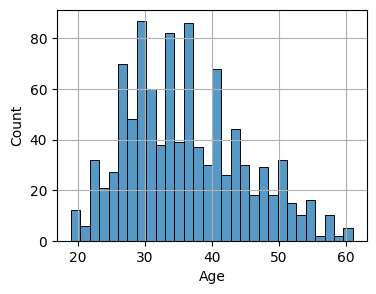

In [53]:
# 
plt.figure(figsize= (4,3))
sns.histplot(ad_data['Age'], bins= 30)
plt.grid(True)
plt.show()

**Jointplot showing Area Income versus Age.**

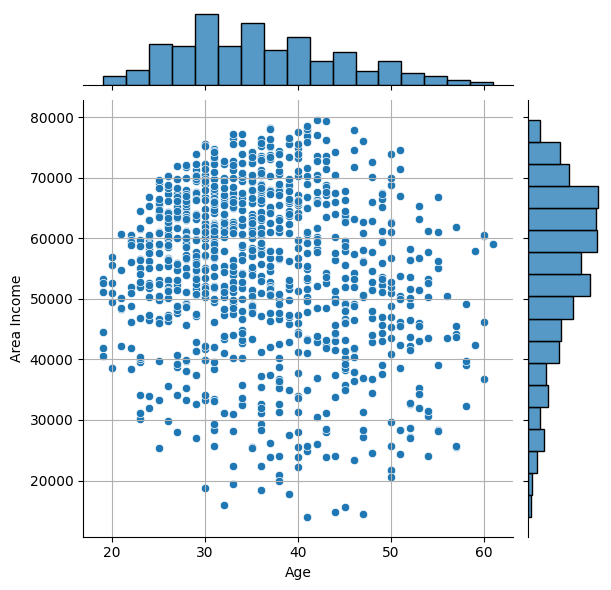

In [54]:
sns.jointplot(x='Age', y='Area Income', data= ad_data)
plt.grid(True)
plt.show()

**Jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

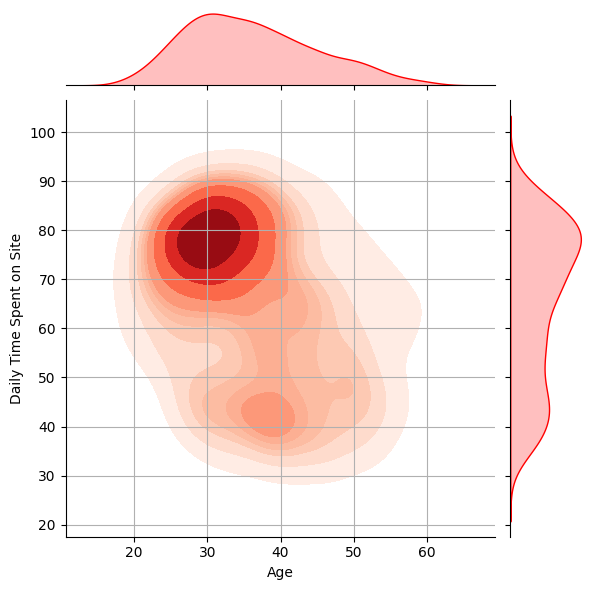

In [55]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', kind='kde', fill=True, color='red', cmap='Reds', data=ad_data)
plt.grid(True)
plt.show()

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

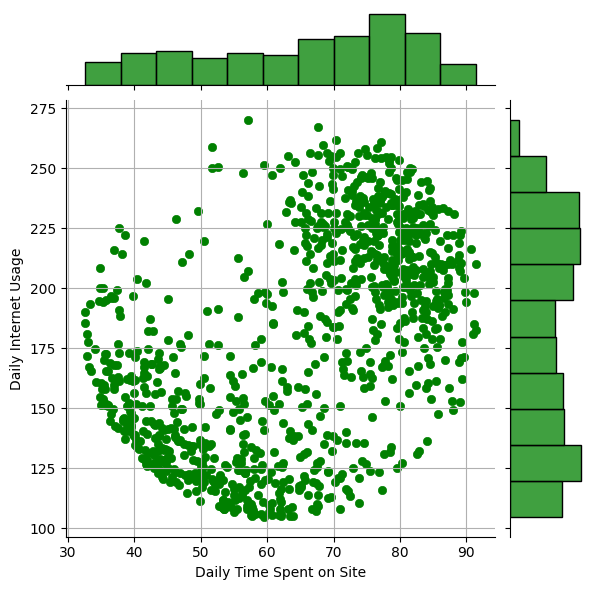

In [56]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', color='green', data=ad_data, marker='o', edgecolor='green')
plt.grid(True)
plt.show()

**Pairplot with the hue defined by the 'Clicked on Ad' column feature.**

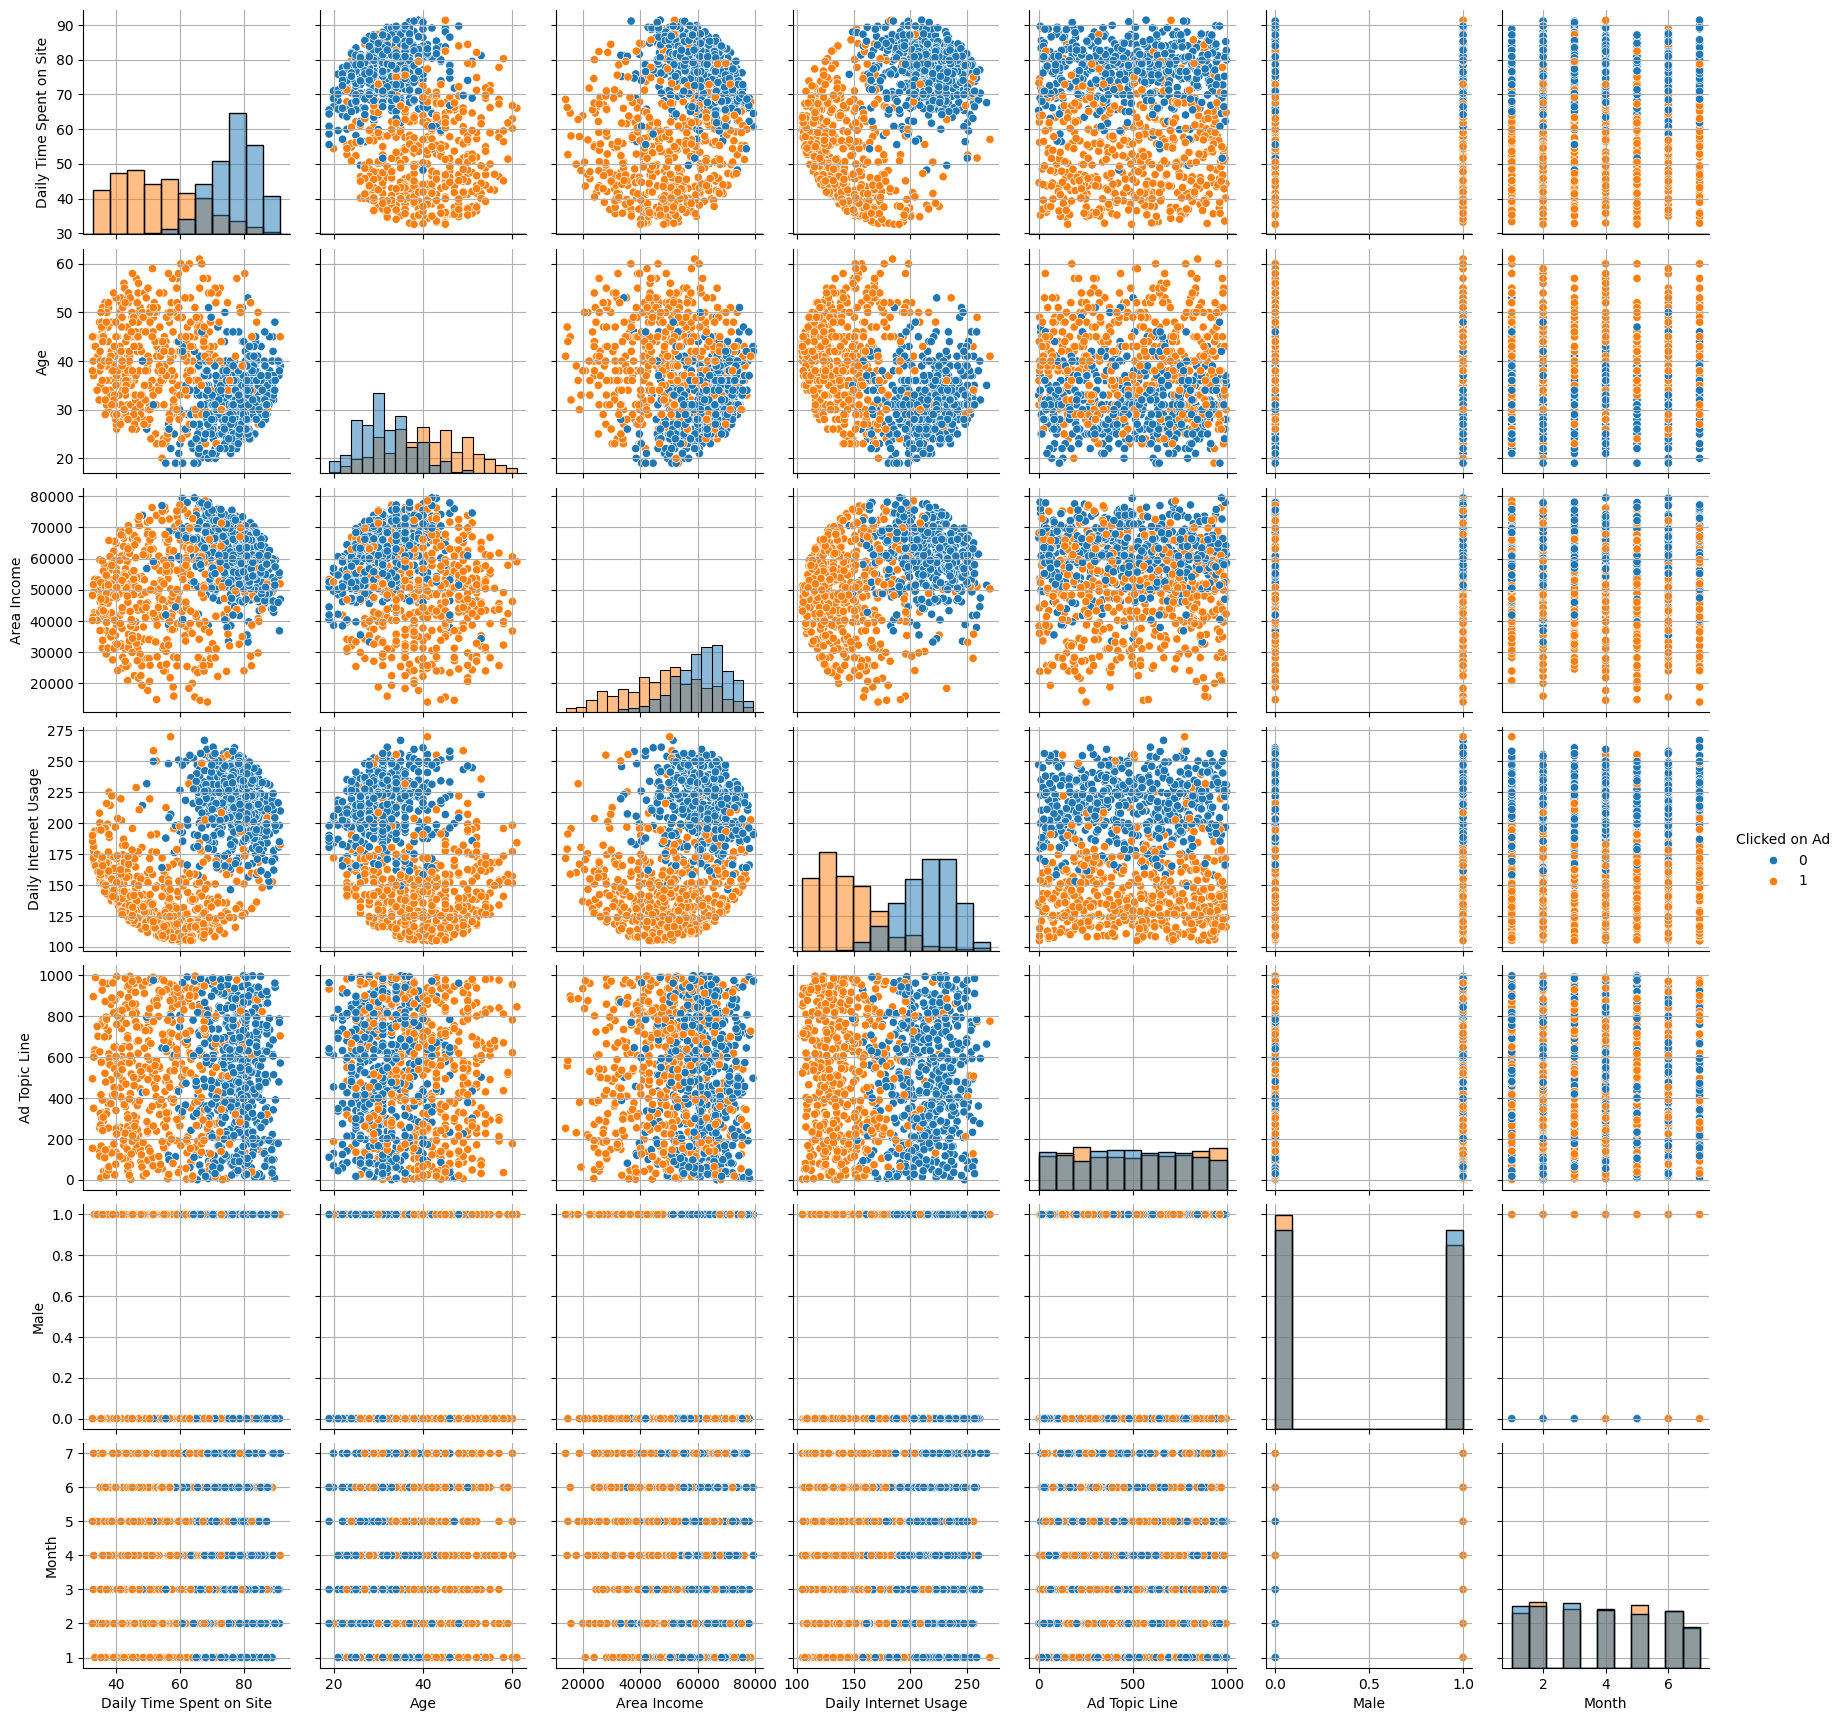

In [57]:
g = sns.pairplot(data=ad_data.drop(['City', 'Country'], axis= 1), hue='Clicked on Ad', diag_kind="hist")
for ax in g.axes.flatten():
    ax.grid(True)
plt.show()

# Logistic Regression

Now it's time to do a train test split, and train our model!

### Scaling

In [58]:
scaler = StandardScaler()
ad_data['Daily Internet Usage'] = scaler.fit_transform(ad_data[['Daily Internet Usage']])
ad_data['Daily Time Spent on Site'] = scaler.fit_transform(ad_data[['Daily Time Spent on Site']])
ad_data['Area Income'] = scaler.fit_transform(ad_data[['Area Income']])

### Training

In [59]:
x = ad_data.drop(['Clicked on Ad'], axis=1)
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Month
0,0.249267,35,0.509691,1.734030,91,961,0,215,3
1,0.961132,31,1.002530,0.313805,464,903,1,147,4
2,0.282083,26,0.356949,1.287589,566,111,0,184,3
3,0.577432,29,-0.014456,1.501580,903,939,1,103,1
4,0.212664,35,1.408868,1.038731,766,805,0,96,6


In [60]:
y = ad_data['Clicked on Ad']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [62]:
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)


(800, 9)
(800,)

(200, 9)
(200,)


**Training and fitting a logistic regression model on the training set.**

In [63]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

d:\DEPI\Technical\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations

In [64]:
train_pred = lr_model.predict(x_train)
train_pred[:5]

array([0, 0, 0, 0, 1])

In [65]:
test_pred = lr_model.predict(x_test)
test_pred[:5]

array([1, 1, 1, 1, 0])

### Without Scaling or Month Feature

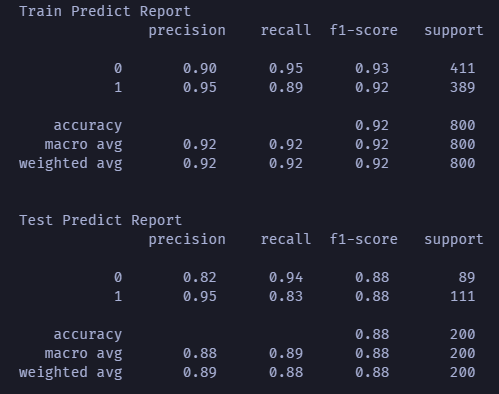

### With Month Feature and no Scaling 

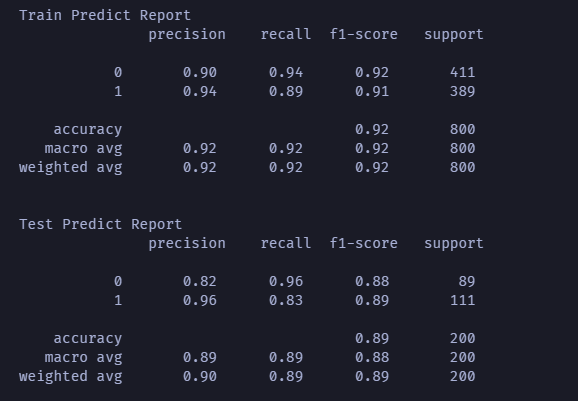

### Scaling With no Month Feature

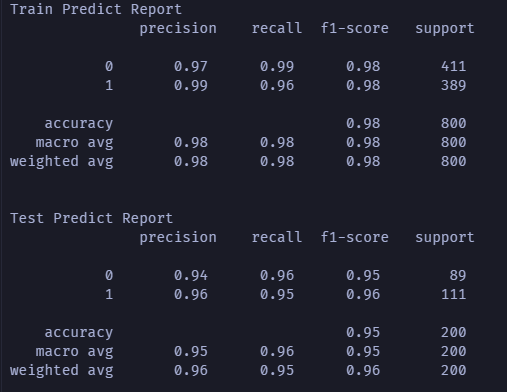

### After Scaling and using Month Feature

In [66]:
print("Train Predict Report\n", classification_report(y_train, train_pred))
print("\nTest Predict Report\n", classification_report(y_test, test_pred))

Train Predict Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       411
           1       0.99      0.97      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800


Test Predict Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



Month feature had a slight negative effect on the performance after scaling

# Waiting for your suggestions and feedback!